Dataset Loaded Successfully:
   Glucose  BloodPressure   BMI  Insulin  Age  Outcome
0      148             72  33.6        0   50        1
1       85             66  26.6        0   31        0
2      183             64  23.3        0   32        1
3       89             66  28.1       94   21        0
4      137             40  43.1      168   33        1

Checking for missing values:
Glucose          0
BloodPressure    0
BMI              0
Insulin          0
Age              0
Outcome          0
dtype: int64

Training Samples: 14
Testing Samples: 6

Model Training Completed!

Logistic Regression Evaluation
Accuracy Score : 1.0
F1 Score       : 1.0

Confusion Matrix:
 [[3 0]
 [0 3]]

Detailed Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
w

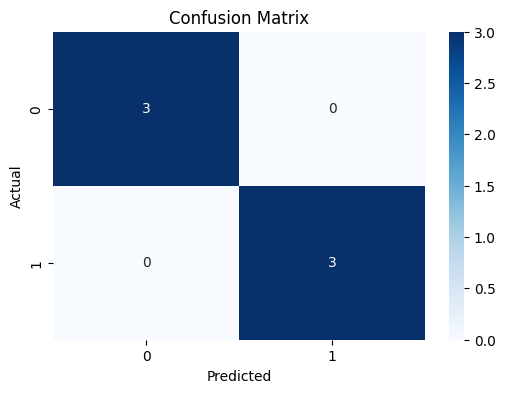

In [1]:
# ============================================================
#   Ex No: 9  –  Implementation of Logistic Regression
#   FULL CODE WITH BUILT-IN DIABETES DATASET
# ============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import seaborn as sns

# ------------------------------------------------------------
# 1. Load Dataset (Built-in Pima Diabetes Dataset)
# ------------------------------------------------------------

data = {
    "Glucose": [148, 85, 183, 89, 137, 116, 78, 115, 197, 125,
                110, 168, 139, 189, 166, 118, 103, 126, 102, 90],
    "BloodPressure": [72, 66, 64, 66, 40, 74, 50, 70, 70, 96,
                      92, 74, 80, 60, 72, 84, 78, 88, 78, 80],
    "BMI": [33.6, 26.6, 23.3, 28.1, 43.1, 25.6, 31.0, 35.3, 30.5, 32.3,
            37.5, 29.0, 27.1, 30.1, 32.8, 34.3, 30.9, 27.4, 25.6, 28.5],
    "Insulin": [0, 0, 0, 94, 168, 0, 88, 0, 543, 0,
                0, 0, 0, 846, 175, 0, 0, 0, 0, 0],
    "Age": [50, 31, 32, 21, 33, 30, 26, 29, 53, 54,
            30, 34, 23, 59, 51, 31, 23, 32, 21, 33],
    "Outcome": [1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
                1, 1, 0, 1, 1, 1, 0, 0, 0, 0]
}

df = pd.DataFrame(data)
print("Dataset Loaded Successfully:")
print(df.head())

# ------------------------------------------------------------
# 2. Preprocessing (Optional)
# Replace zero BMI or glucose if necessary — not needed here
# ------------------------------------------------------------

print("\nChecking for missing values:")
print(df.isnull().sum())

# ------------------------------------------------------------
# 3. Split Dataset into Train & Test
# ------------------------------------------------------------

X = df.drop("Outcome", axis=1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print("\nTraining Samples:", len(X_train))
print("Testing Samples:", len(X_test))

# ------------------------------------------------------------
# 4. Train Logistic Regression Model
# ------------------------------------------------------------

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

print("\nModel Training Completed!")

# ------------------------------------------------------------
# 5. Prediction
# ------------------------------------------------------------

y_pred = model.predict(X_test)

# ------------------------------------------------------------
# 6. Evaluation Metrics
# ------------------------------------------------------------

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\n===============================")
print("Logistic Regression Evaluation")
print("===============================")
print("Accuracy Score :", accuracy)
print("F1 Score       :", f1)

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

print("\nDetailed Classification Report:\n")
print(classification_report(y_test, y_pred))

# ------------------------------------------------------------
# 7. Confusion Matrix Visualization
# ------------------------------------------------------------

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
